In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.cluster import KMeans
from kmeans import Kmeans as km
import seaborn as sns

In [3]:
sns.set(style="white")

# Load digit dataset

In [4]:
digits = load_digits()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=17)

In [6]:
num_clusters = len(np.unique(y_train))

In [7]:
num_clusters

10

### Let's try sklearn's kmeans

In [8]:
kmn = KMeans(random_state=17, n_clusters=10)

In [9]:
kmn.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [10]:
preds = kmn.predict(X_test)

In [11]:
kmn.inertia_

816246.8572378856

In [12]:
# completeness score - all the data points that are members of a given class are elements of the same cluster
# homogeneity_score - all the data points in given cluster are member of same class.
# v_measure_score - harmonic mean of above 2.
print(homogeneity_score(y_test, preds))
print(completeness_score(y_test, preds))
print(v_measure_score(y_test, preds))

0.7325106393343521
0.7405376620044366
0.7365022800040238


In [13]:
print(adjusted_rand_score(y_test, preds))
print(adjusted_mutual_info_score(y_test, preds))
print(silhouette_score(X_test, preds, metric='euclidean', sample_size=300))

0.6388777382795199
0.7270637929749358
0.17473280987155465


### Now our implementation

In [14]:
kmn1 = km(num_clusters=10, random_seed=17)

In [15]:
kmn1.fit(X_train)

In [16]:
preds = kmn1.predict(X_test)

In [17]:
kmn1.inertia_

819425.1920448357

In [18]:
print(homogeneity_score(y_test, preds))
print(completeness_score(y_test, preds))
print(v_measure_score(y_test, preds))

0.7336057792021443
0.7548637814437905
0.7440829792142133


In [19]:
print(adjusted_rand_score(y_test, preds))
print(adjusted_mutual_info_score(y_test, preds))
print(silhouette_score(X_test, preds, metric='euclidean', sample_size=300))

0.6179602589963656
0.7347949442781798
0.18289618190914575


#### Let's run PCA  to reduce dimentionality to 2 and try to plot clusters

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2).fit(X_train)

In [22]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
kmn2 = km(num_clusters=10, random_seed=17)

In [24]:
kmn2.fit(X_train_pca)

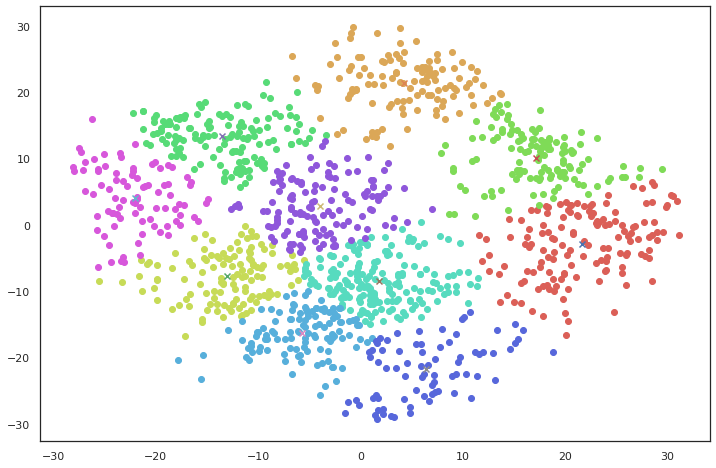

In [25]:
palette = sns.color_palette("hls", num_clusters + 1)
_, ax = plt.subplots(figsize=(12, 8))

for i, index in enumerate(range(num_clusters)):
    point = np.array(kmn2.clusters_[index]).T
    ax.scatter(*point, c=[palette[i], ])

for point in kmn2.centroids_:
    ax.scatter(*point, marker="x", linewidths=10)
plt.show()